In [1]:
from keras.datasets import mnist
import numpy as np

(X_train,y_train),(X_test,y_test) = mnist.load_data()


num_labels = len(np.unique(y_train))
X_train.shape

(60000, 28, 28)

In [2]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
 
image_size = X_train.shape[1]
image_size

28

In [3]:
#samples,timestep,features
X_train = np.reshape(X_train,[-1,image_size,image_size])
X_test = np.reshape(X_test,[-1,image_size,image_size])

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [4]:
input_size =(image_size,image_size)
num_units = 256
batch_size = 128
drop_out =0.2


In [5]:
from  keras.models import Sequential

from keras.layers import Activation,Dropout,Dense,SimpleRNN

model = Sequential()
model.add(SimpleRNN(units=num_units,dropout=drop_out,input_shape=input_size))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.summary()
 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 256)               72960     
_________________________________________________________________
dense (Dense)                (None, 10)                2570      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


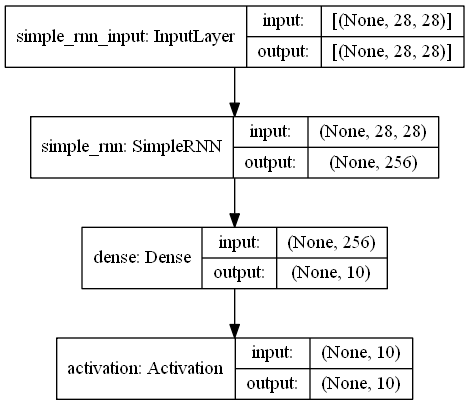

In [6]:
from keras.utils import plot_model
plot_model(model, to_file='RNN-mnist.png', show_shapes=True)

In [7]:
model.compile(loss='categorical_crossentropy' ,optimizer='sgd',metrics=['accuracy'])


In [8]:
model.fit(X_train,y_train,epochs=20,batch_size=batch_size)


Epoch 1/20
469/469 [==============================] - 11s 20ms/step - loss: 1.1855 - accuracy: 0.6374
Epoch 2/20
469/469 [==============================] - 11s 22ms/step - loss: 0.3529 - accuracy: 0.8986
Epoch 3/20
469/469 [==============================] - 11s 23ms/step - loss: 0.2504 - accuracy: 0.9264
Epoch 4/20
469/469 [==============================] - 16s 33ms/step - loss: 0.2066 - accuracy: 0.9376
Epoch 5/20
469/469 [==============================] - 19s 40ms/step - loss: 0.1758 - accuracy: 0.9484
Epoch 6/20
469/469 [==============================] - 15s 32ms/step - loss: 0.1513 - accuracy: 0.9548
Epoch 7/20
469/469 [==============================] - 10s 22ms/step - loss: 0.1395 - accuracy: 0.9587
Epoch 8/20
469/469 [==============================] - 11s 24ms/step - loss: 0.1276 - accuracy: 0.9622
Epoch 9/20
469/469 [==============================] - 11s 24ms/step - loss: 0.1176 - accuracy: 0.9640
Epoch 10/20
469/469 [==============================] - 11s 24ms/step - loss: 0.110

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
loss,score = model.evaluate(X_test,y_test,batch_size=batch_size)

print('Loss : ',loss)
print('Accuracy Score : ',score)

79/79 [==============================] - 1s 8ms/step - loss: 0.0601 - accuracy: 0.9803
Loss :  0.0600685179233551
Accuracy Score :  0.9803000092506409
